# Hello, FABRIC: Create your first FABRIC slice


## Configure the Environment

### Create the FABRIC Proxies

The FABRIC API is used via proxy objects that manage connections to the control framework. 


In [35]:
import os
from fabrictestbed.slice_manager import SliceManager, Status
import json

In [36]:
ssh_key_file_priv="/home/fabric/.ssh/id_rsa"
ssh_key_file_pub="/home/fabric/.ssh/id_rsa.pub"

ssh_key_pub = None
with open (ssh_key_file_pub, "r") as myfile:
    ssh_key_pub=myfile.read()
    ssh_key_pub=ssh_key_pub.strip()

In [37]:
credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
print(f"CM Host: {credmgr_host} Orchestrator Host: {orchestrator_host}")

CM Host: beta-2.fabric-testbed.net Orchestrator Host: beta-7.fabric-testbed.net


## Create Slice Manager Object
Users can request tokens with different Project and Scopes by altering `project_name` and `scope` parameters in the refresh call below.

In [38]:
slice_manager = SliceManager(oc_host=orchestrator_host, cm_host=credmgr_host ,project_name='all', scope='all')

# Initialize the slice manager
slice_manager.initialize()

### Orchestrator API example to query for available resources

In [39]:
status, advertised_topology = slice_manager.resources()

print(f"Status: {status}")
if status == Status.OK:
    print(f"Toplogy: {advertised_topology}")
else:
    print(f"Error: {advertised_topology}")

Status: Status.OK
Toplogy: LBNL: { cpu: 6/6 , core: 190/192 , ram: 1,520/1,536 G, disk: 9,500/9,600 G, unit: 3/3 }
	Components:
		NVME-P4510:  NVME P4510 { disk: 10,000/10,000 G, unit: 10/10 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
	Site Interfaces:
UKY: { cpu: 6/6 , core: 188/192 , ram: 1,520/1,536 G, disk: 9,472.0/9,600 G, unit: 3/3 }
	Components:
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		NVME-P4510:  NVME P4510 { disk: 10,000/10,000 G, unit: 10/10 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
	Site Interfaces:
RENC
	Components:
		NVME-P4510:  NVME P4510 { disk: 10,000/10,000 G, uni

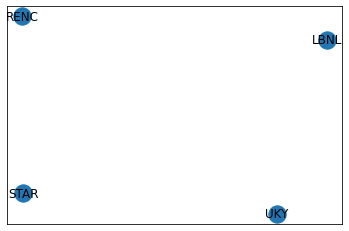

In [40]:
if status == Status.OK:
    advertised_topology.draw()

## Create Slice

Creates a single node with basic compute capabilities.

<img src="./figs/SingleNode.png" width="40%"><br>


In [41]:
from fabrictestbed.slice_editor import ExperimentTopology, Capacities, ComponentType, ComponentModelType, ServiceType
# Create topology
myExperiment = ExperimentTopology()

# Add node
myNode = myExperiment.add_node(name='Node1', site='UKY')

# Set capacities
cap = Capacities()
cap.set_fields(core=2, ram=16, disk=100)

# Set Properties
myNode.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Generate Slice Graph
slice_graph = myExperiment.serialize()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='MySlice', slice_graph=slice_graph, ssh_key=ssh_key_pub)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")

Response Status Status.OK
Reservations created [{
    "graph_node_id": "ca979537-7a67-4a38-bccb-d9e3ffb4641c",
    "lease_end": "2021-08-28 19:32:38",
    "pending_state": "None_",
    "reservation_id": "c3bc49c1-f47c-4c35-8a73-a02aa19bd7be",
    "reservation_state": "Unknown",
    "slice_id": "75bb89f5-8725-475e-ac92-19b73bc49257"
}]


In [42]:
# Set the Slice ID from output of the above command
slice_id=reservations[0].slice_id

print("Slice ID: {}".format(slice_id))

Slice ID: 75bb89f5-8725-475e-ac92-19b73bc49257


## Query Slices

You can get a list of all your slices from the slice manager. If this is your first slice, it should return only one slice.

Note that the status returned by the call to slices indicates the success or failure of the call to the FABRIC control framework. The status is not the status of the slices.  The status of each slice is included in the list of slices.

Re-run this cell until your slice becomes "StableOK". 

In [46]:
status, slices = slice_manager.slices(state="All")

print("Response Status {}".format(status))
if status == Status.OK:
    print("Slices {}".format(slices))
else:
    print(f"Failure: {slices}")

Response Status Status.OK
Slices [{
    "graph_id": "ce28a02b-b5a2-4818-8c7d-b86cd85d3abf",
    "lease_end": "2021-08-28 13:28:00",
    "slice_id": "47c234ec-7550-40ce-b17f-43b105a27068",
    "slice_name": "hello-fabric",
    "slice_state": "Dead"
}, {
    "graph_id": "aaad467c-dbed-499d-a033-515fdd6fa55a",
    "lease_end": "2021-08-28 13:11:05",
    "slice_id": "c21a4b69-77d1-4dab-bd95-bd30b2b90f33",
    "slice_name": "hello-fabric",
    "slice_state": "Dead"
}, {
    "graph_id": "1e72d42f-afd1-4e64-bb76-ddd290f95182",
    "lease_end": "2021-08-28 14:30:09",
    "slice_id": "92ea49c8-b568-4198-940c-db7fee8f266f",
    "slice_name": "my_simple_slice",
    "slice_state": "Dead"
}, {
    "graph_id": "6efcf812-1c39-4d36-bd2a-621ddf34fb00",
    "lease_end": "2021-08-28 15:00:21",
    "slice_id": "56d7acd6-7cad-4bcd-b35c-0e0fdbe9429e",
    "slice_name": "my_simple_slice",
    "slice_state": "Dead"
}, {
    "graph_id": "74e77136-a432-4b01-b8ce-d99ff7461c47",
    "lease_end": "2021-08-28 17:14

## Get Slice

In [47]:
status, slice = slice_manager.get_slice(slice_id=slice_id)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Slice {}".format(slice))
else:
    print(f"Failure: {slice}")

Response Status Status.OK
Slice Node1[VM]:  { core: 2 , ram: 16 G, disk: 100 G}
Links:


## Query Slivers

In [48]:
status, slivers = slice_manager.slivers(slice_id=slice_id)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Slivers {}".format(slivers))
else:
    print(f"Failure: {slivers}")

Response Status Status.OK
Slivers [{
    "allocated_capacities": "{\"core\": 4, \"disk\": 100, \"ram\": 16}",
    "allocated_labels": "{\"instance\": \"instance-000002f5\", \"instance_parent\": \"uky-w2.fabric-testbed.net\"}",
    "capacities": "{\"core\": 2, \"disk\": 100, \"ram\": 16}",
    "capacity_hints": "{\"instance_type\": \"fabric.c4.m16.d100\"}",
    "graph_node_id": "ca979537-7a67-4a38-bccb-d9e3ffb4641c",
    "join_state": "NoJoin",
    "lease_end": "2021-08-28 19:32:38",
    "management_ip": "128.163.179.41",
    "name": "Node1",
    "pending_state": "None_",
    "reservation_id": "c3bc49c1-f47c-4c35-8a73-a02aa19bd7be",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "UKY",
    "slice_id": "75bb89f5-8725-475e-ac92-19b73bc49257"
}]


## Sliver Status

In [49]:
for s in slivers:
    status, sliver_status = slice_manager.sliver_status(slice_id=slice_id, sliver_id=s.reservation_id)

    print("Response Status {}".format(status))
    if status == Status.OK:
        print()
        print("Sliver Status {}".format(sliver_status))
        print()

Response Status Status.OK

Sliver Status {
    "allocated_capacities": "{\"core\": 4, \"disk\": 100, \"ram\": 16}",
    "allocated_labels": "{\"instance\": \"instance-000002f5\", \"instance_parent\": \"uky-w2.fabric-testbed.net\"}",
    "capacities": "{\"core\": 2, \"disk\": 100, \"ram\": 16}",
    "capacity_hints": "{\"instance_type\": \"fabric.c4.m16.d100\"}",
    "graph_node_id": "ca979537-7a67-4a38-bccb-d9e3ffb4641c",
    "join_state": "NoJoin",
    "lease_end": "2021-08-28 19:32:38",
    "management_ip": "128.163.179.41",
    "name": "Node1",
    "notices": "Reservation c3bc49c1-f47c-4c35-8a73-a02aa19bd7be (Slice MySlice(75bb89f5-8725-475e-ac92-19b73bc49257) Graph Id:03312688-af0c-4552-a125-ba3887d10441 Owner:name: orchestrator guid: orchestrator-guid email: pruth@email.unc.edu State:StableOK ) is in state [Active,None_]\n\nLast ticket update: \nTicket events: \nLast ticket update: \nTicket events: ",
    "pending_state": "None_",
    "reservation_id": "c3bc49c1-f47c-4c35-8a73-a02

## Log into the nodes

In [50]:
script= '#!/bin/bash  \n' \
        'echo Hello, FABRIC from node `hostname -s`   \n'

In [51]:
import paramiko 

key = paramiko.RSAKey.from_private_key_file(ssh_key_file_priv)
client = paramiko.SSHClient()
client.load_system_host_keys()
client.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())

for sliver in slivers:
    node_name = sliver.name
    management_ip = sliver.management_ip
    
    print("Node {0} IP {1}".format(node_name, management_ip))
    
    client.connect(management_ip,username='centos',pkey = key)

    stdin, stdout, stderr = client.exec_command('echo \"' + script + '\" > script.sh; chmod +x script.sh; sudo ./script.sh')
    print ('')
    print (str(stdout.read(),'utf-8').replace('\\n','\n'))

    client.close()

Node Node1 IP 128.163.179.41

Hello, FABRIC from node c3bc49c1-f47c-4c35-8a73-a02aa19bd7be-node1



## Delete Slice

In [23]:
status, result = slice_manager.delete(slice_id=slice_id)

print("Response Status {}".format(status))
print("Response received {}".format(result))

Response Status Status.FAILURE
Response received (500)
Reason: INTERNAL SERVER ERROR
HTTP response headers: HTTPHeaderDict({'Server': 'nginx/1.19.8', 'Date': 'Fri, 27 Aug 2021 19:27:40 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '100', 'Connection': 'keep-alive', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Headers': 'DNT, User-Agent, X-Requested-With, If-Modified-Since, Cache-Control, Content-Type, Range', 'Access-Control-Allow-Methods': 'GET, POST, PUT, DELETE, OPTIONS', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'Content-Length, Content-Range, X-Error', 'X-Error': 'Unable to delete Slice# 84e82eba-985d-479e-8465-70525efed066 that is not yet stable, try again later'})
HTTP response body: Unable to delete Slice# 84e82eba-985d-479e-8465-70525efed066 that is not yet stable, try again later

